# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [8]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm
from itertools import combinations

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 1 # put your index here

In [4]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print ("Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [9]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """

    def __init__(self, k=2, linkage='single', **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.linkage = linkage
        return

    def __dist(self, X):
        x_dist = (X ** 2).sum(axis=1)
        xy_dist = X.dot(X.T)
        dist = - 2 * xy_dist + x_dist + x_dist.reshape(-1, 1)
        return dist

    def __single(self, A, B):
        return np.min(self.dist[A].T[B])

    def __complete(self, A, B):
        return np.max(self.dist[A].T[B])

    def __average(self, A, B):
        return np.sum(self.dist[A].T[B]) / (len(A) * len(B))
 
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.dist = self.__dist(x)
        self.x_len = len(x)
        self.C = [[i] for i in range(self.x_len)]
        if self.linkage == 'single':
            self.L = self.__single
        elif self.linkage == 'complete':
            self.L = self.__complete
        elif self.linkage == 'average':
            self.L = self.__average
        return self

    def __search(self, c_min1, c_min2, buff):
        for c1, c2 in combinations(self.C, 2):
            buff2 = self.L(c1, c2)
            if buff2 < buff:
                c_min1, c_min2, buff = c1, c2, buff2
        return c_min1, c_min2, buff

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        while len(self.C) > self.k:
            buff = self.L(self.C[0], self.C[1])
            c_min1, c_min2 = self.C[0], self.C[1]
            c_min1, c_min2, buff = self.__search(c_min1, c_min2, buff)

            self.C.remove(c_min1)
            self.C.remove(c_min2)
            self.C.append(c_min1 + c_min2)

        self.y = np.zeros(self.x_len)
        for i, c in enumerate(self.C):
            self.y[c] = i

        return self.y

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

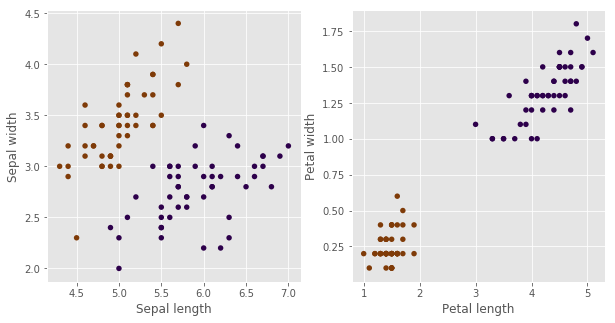

In [6]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [10]:
pred_iris = Clustering().fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [20]:
## Задание 2
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    m = []
    clusters = np.unique(y)
    for c in clusters:
        m.append(np.mean(x[y == i], axis=0))
    m = np.array(m)
    crit = np.sum(np.min(dist(x, m), axis=1))
    return crit

def dist(x, y):
    x_dist = (x ** 2).sum(axis=1)
    y_dist = (y ** 2).sum(axis=1)
    xy_dist = x.dot(y.T)
    return -1 * 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

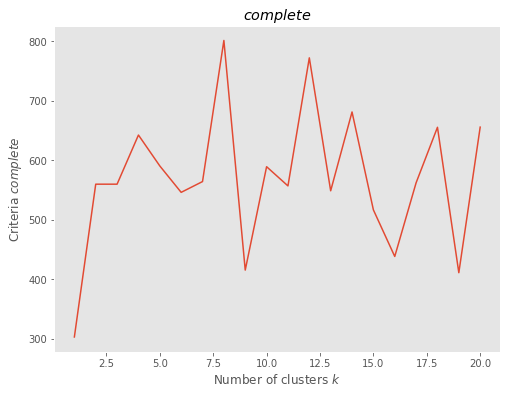

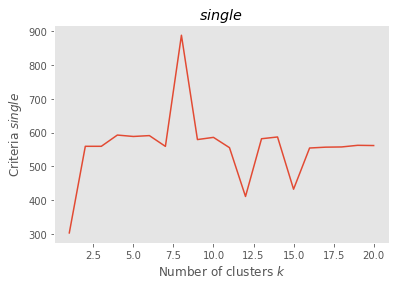

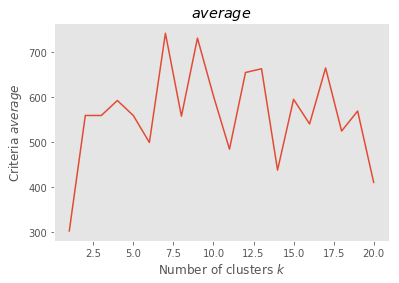

In [30]:
ks = range(1, 21)
criteria = np.zeros(len(ks))
link = ['complete', 'single', 'average']

pl.figure(figsize=(8, 6))
for linkage in link:
    for i, k in enumerate(ks):
        cls = Clustering(k=k, linkage=linkage)
        y = cls.fit_predict(x_iris)
        criteria[i] = quality(x_iris, y)

    pl.plot(ks, criteria, label='linkage ')
    pl.title("$"+linkage+"$")
    pl.ylabel("Criteria $"+linkage+"$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

In [31]:
## Задание 3

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/User/Downloads/WDI_csv/WDIData.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [32]:
year = df.count().iloc[4:].idxmax()
df2 = df.loc[:, ['Country Name', 'Indicator Name', year]]
df2 = df2.pivot(index='Country Name', columns='Indicator Name', values=year)
df2.head()

Indicator Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,20.68,42.700000,32.400000,82.800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.642105
Albania,NaN,NaN,NaN,65.23,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.373536
Algeria,NaN,NaN,NaN,92.41,98.884972,97.594271,99.505684,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.078491
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,100.00,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_ = df2.iloc[:, np.array(df2.count() >= 262)]
df_ = df_.fillna(df_.mean())
df_ = df_.dropna(axis=1, how='all')
df_.head()

Indicator Name,Land area (sq. km),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km)
Country Name,,,,,
Afghanistan,652860.0,44.118443,2.812617,28803167.0,652860.0
Albania,27400.0,106.314635,-0.496462,2913021.0,28750.0
Algeria,2381740.0,15.164391,1.821358,36117637.0,2381740.0
American Samoa,200.0,278.185000,-1.054862,55637.0,200.0
Andorra,470.0,179.678723,-0.015393,84449.0,470.0


In [36]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_)
x.shape

(264, 5)

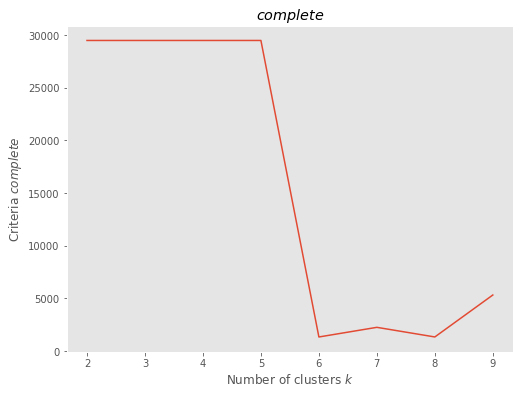

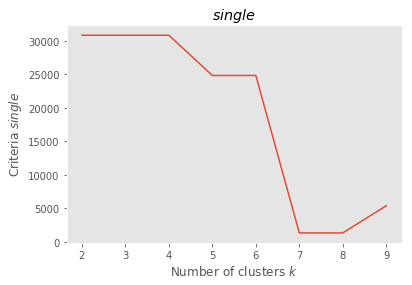

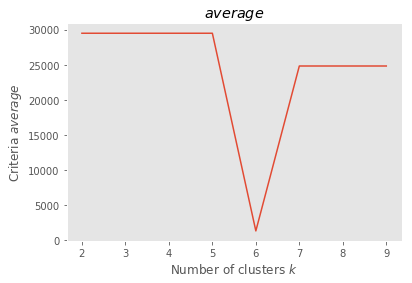

In [51]:
ks = range(2, 10)
criteria = np.zeros(len(ks))
link = ['complete', 'single', 'average']

pl.figure(figsize=(8, 6))
for linkage in link:
    for i, k in enumerate(ks):
        cls = Clustering(k=k, linkage=linkage)
        y = cls.fit_predict(x)
        criteria[i] = quality(x, y)

    pl.plot(ks, criteria, label='linkage ')
    pl.title("$"+linkage+"$")
    pl.ylabel("Criteria $"+linkage+"$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

In [61]:
clustering = Clustering(k=12, linkage='complete')
y = clustering.fit_predict(x)

In [65]:
countries = list(df_.index)
print(y)

[11.  6. 11.  6.  6.  9. 11. 11. 11.  6.  6. 11. 11. 11. 11.  9. 11. 11.
  6. 11. 11. 11.  6. 11. 11.  6. 11. 11. 11. 11.  6.  9.  9. 11. 11. 11.
 11. 11. 11. 11.  6.  9. 11. 11. 11. 11. 11.  9.  9. 11. 11.  6.  6. 11.
 11. 11. 11. 11. 11. 11.  4.  4. 11. 11. 11. 11. 11.  9. 11.  6. 11.  6.
  7.  7.  7.  6.  6. 11. 11. 11. 11. 11.  9.  9.  6.  6. 11.  8.  6. 11.
 11.  6. 11. 11. 11.  6. 11.  7.  7. 11.  8.  6. 10. 10. 11.  7.  7.  6.
 11. 11. 11. 11. 11. 11. 11. 11. 11.  6.  9. 11. 11. 11. 11. 11. 11.  9.
 11. 11.  5.  7.  7.  7.  6.  7.  9. 11.  9. 11. 11.  6. 10. 11.  4. 11.
  3.  6. 11.  9. 11. 11.  9. 11.  6. 11.  6. 11.  6. 11. 11. 11. 10.  6.
  3. 11.  6. 11. 11. 11. 11.  6. 11. 11. 11. 11. 11.  9. 11.  7.  6. 11.
 11.  7.  9. 11. 11. 11. 11. 11. 11. 11. 11. 11.  6.  6.  7.  7.  6.  0.
  6.  7. 11. 11. 11. 11. 11. 11.  6. 11. 11.  8.  1.  6. 11. 11. 11. 11.
 11. 11. 11.  9. 11. 11. 11. 11. 11.  6.  7.  7.  7. 11. 11. 11. 11. 11.
 11. 11.  9. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11

In [40]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2).fit_transform(x)

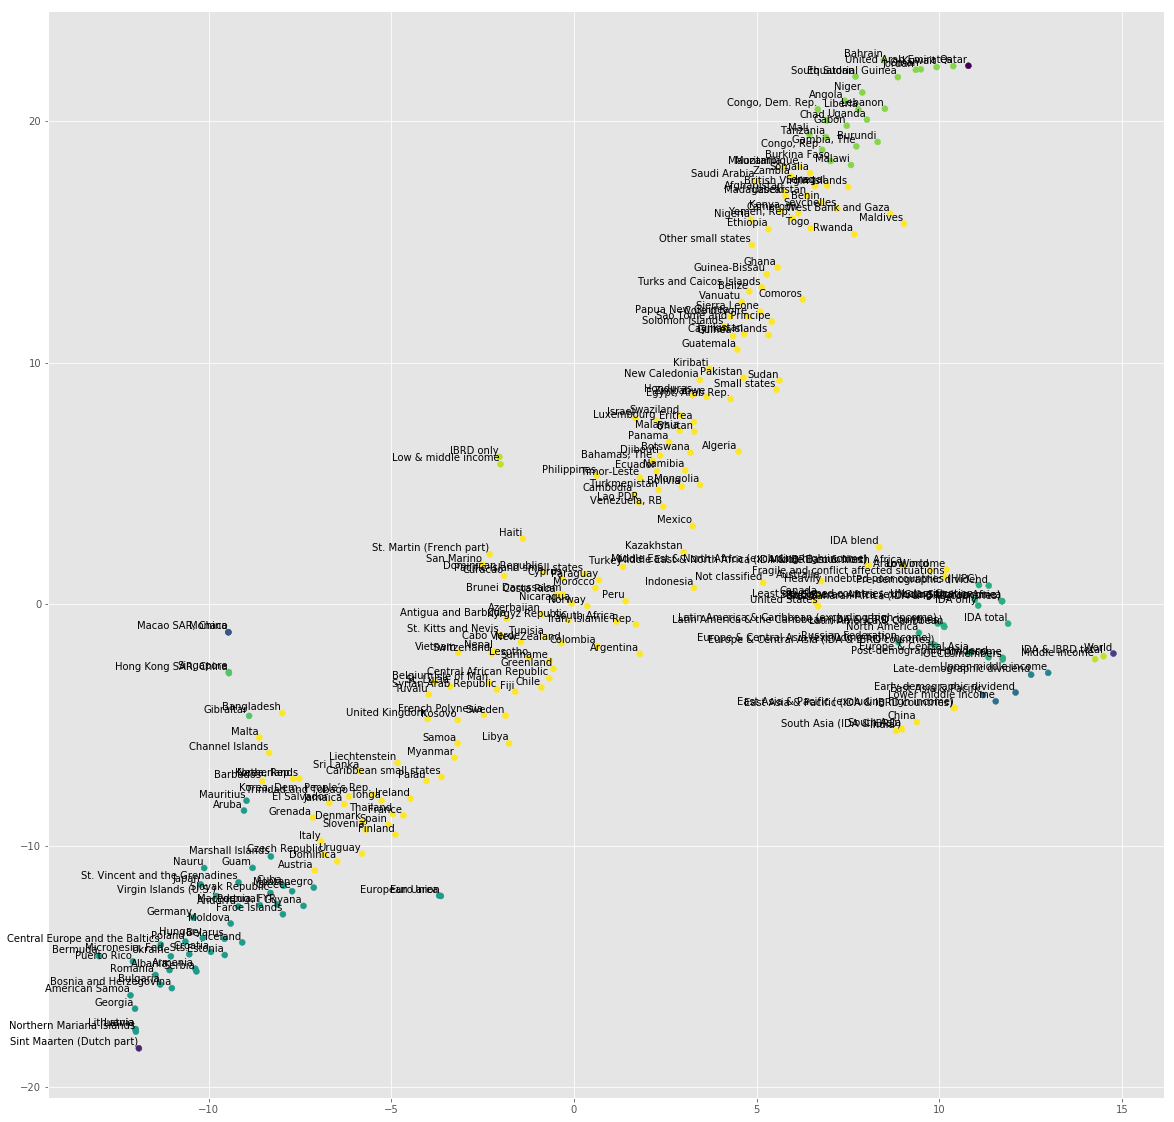

In [63]:
pl.figure(figsize=(20, 20))
pl.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
for label, i, j in zip(countries, x_tsne[:, 0], x_tsne[:, 1]):
    pl.annotate(
        label,
        xy=(i, j), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom',
    )

pl.show()

In [66]:
for i in range(12):
    print('cluster {}'.format(i))
    for c in range(len(countries)):
        if y[c] == i:
            print(countries[c])

cluster 0
Qatar
cluster 1
Sint Maarten (Dutch part)
cluster 2
World
cluster 3
Macao SAR, China
Monaco
cluster 4
Early-demographic dividend
East Asia & Pacific
Lower middle income
cluster 5
Late-demographic dividend
Upper middle income
cluster 6
Albania
American Samoa
Andorra
Armenia
Aruba
Belarus
Bermuda
Bosnia and Herzegovina
Bulgaria
Central Europe and the Baltics
Croatia
Cuba
Estonia
Euro area
European Union
Faroe Islands
Georgia
Germany
Greece
Guam
Guyana
Hungary
Iceland
Japan
Latvia
Lithuania
Macedonia, FYR
Marshall Islands
Mauritius
Micronesia, Fed. Sts.
Moldova
Montenegro
Nauru
Northern Mariana Islands
Poland
Portugal
Puerto Rico
Romania
Serbia
Slovak Republic
St. Vincent and the Grenadines
Ukraine
Virgin Islands (U.S.)
cluster 7
Europe & Central Asia
Europe & Central Asia (IDA & IBRD countries)
Europe & Central Asia (excluding high income)
Heavily indebted poor countries (HIPC)
High income
IDA only
IDA total
Latin America & Caribbean
Latin America & Caribbean (excluding high in

In [1]:
Выводы:
    
Кластеры 0(Qatar), 1(Sint Maarten (Dutch part)), 2(World), 3(Macao SAR, China
Monaco), 4(Early-demographic dividend,East Asia & Pacific, Lower middle income), 
5(Late-demographic dividend,Upper middle income) и 8(Gibraltar, Hong Kong SAR, China,
Singapore), 10(IBRD only,IDA & IBRD total,Low & middle income, Middle income) - выбросы, состоят из слишком малого 
количества элементов, слишком сильно отличаются по выбранным признакам от преобладающих кластеров.

Разбиение на кластеры получилось при использовании самых информативных(с наименьшим количествои gap-ов в данных) 
признаков: Land area (sq. km),Population density (people per sq. km of land area), Population growth (annual %), 
Population, total, Surface area (sq. km).

Далее рассмотрим рапределение по "хорошим" кластерам:

6-й кластер:
Кластер с преобладанием стран Европы, также присутствует Япония(по указанным признакам соотносится со странами Европы, например United Arab Emirates).

7-й кластер:
Кластер состоит преимущественно из регионов.

9-й кластер:
Кластер стран Латинской Америки и Африки.

11-й кластер:
Обширный кластер, выделить один демографический район, преобладающий в кластере трудно. Входят: страны Арабского мира, 
Австралия, некоторые страны Европы(Скандинавия), Латинская Америка и страны Карибских островов, Ближний Восток.

SyntaxError: invalid syntax (<ipython-input-1-cdc8cf71bf11>, line 1)

In [ ]:
## Задание 4
Выводы:
    
Кластеры 0(Qatar), 1(Sint Maarten (Dutch part)), 2(World), 3(Macao SAR, China
Monaco), 4(Early-demographic dividend,East Asia & Pacific, Lower middle income), 
5(Late-demographic dividend,Upper middle income) и 8(Gibraltar, Hong Kong SAR, China,
Singapore), 10(IBRD only,IDA & IBRD total,Low & middle income, Middle income) - выбросы, состоят из слишком малого 
количества элементов, слишком сильно отличаются по выбранным признакам от преобладающих кластеров.

Разбиение на кластеры получилось при использовании самых информативных(с наименьшим количествои gap-ов в данных) 
признаков: Land area (sq. km),Population density (people per sq. km of land area), Population growth (annual %), 
Population, total, Surface area (sq. km).

Далее рассмотрим рапределение по "хорошим" кластерам:

6-й кластер:
Кластер с преобладанием стран Европы, также присутствует Япония(по указанным признакам соотносится со странами Европы, например United Arab Emirates).

7-й кластер:
Кластер состоит преимущественно из регионов.

9-й кластер:
Кластер стран Латинской Америки и Африки.

11-й кластер:
Обширный кластер, выделить один демографический район, преобладающий в кластере трудно. Входят: страны Арабского мира, 
Австралия, некоторые страны Европы(Скандинавия), Латинская Америка и страны Карибских островов, Ближний Восток.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.